In [17]:
import pandas as pd

In [18]:
df = pd.read_excel('Base-de-datos-Cuestionario-Sumativo-M4.xlsx')
df.head()

,Año,"Población, total",Crecimiento de la población (% anual),Población de 65 años de edad y más (% del total),Población entre 15 y 64 años de edad (% del total),Población entre 0 y 14 años de edad (% del total),"Esperanza de vida al nacer, total (años)",Porcentaje de desempleo,Desempleo,Crecimiento
0,1980,27737905.0,2.276776,3.744526,55.655771,40.599703,65.478171,9.1,Bajo,Alto
1,1981,28375995.0,2.274365,3.772840,56.086498,40.140661,66.024927,8.1,Bajo,Alto
2,1982,29027158.0,2.268833,3.800465,56.642886,39.556649,66.520073,9.1,Bajo,Alto
3,1983,29687096.0,2.248060,3.828761,57.242046,38.929193,66.946927,11.1,Medio,Alto
4,1984,30350082.0,2.208675,3.859182,57.770925,38.369893,67.299537,13.1,Medio,Alto


In [19]:
df.describe()

,"Población, total",Crecimiento de la población (% anual),Población de 65 años de edad y más (% del total),Población entre 15 y 64 años de edad (% del total),Población entre 0 y 14 años de edad (% del total),"Esperanza de vida al nacer, total (años)",Porcentaje de desempleo
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.833527e+07,1.619467,4.742600,62.462819,32.794581,70.134554,11.644286
std,6.123497e+06,0.422945,0.839272,4.022065,4.829907,2.496907,3.032235
min,2.773790e+07,0.944004,3.744526,55.655771,24.701504,65.478171,7.800000
25%,3.329999e+07,1.284253,4.073821,59.097329,28.704536,68.112854,9.315000
50%,3.864541e+07,1.555213,4.528274,62.190810,33.280916,70.075000,11.100000
75%,4.356069e+07,1.971658,5.233725,66.061739,36.828850,72.377683,13.000000
max,4.779139e+07,2.276776,6.760251,68.538245,40.599703,73.993146,20.520000


### Fórmulas y supuestos para intervalos de confianza

### Estimación de la media poblacional

        Columna
count  7.000000
mean   5.957143
std    1.826524
min    3.100000
25%    4.850000
50%    6.400000
75%    7.050000
max    8.400000


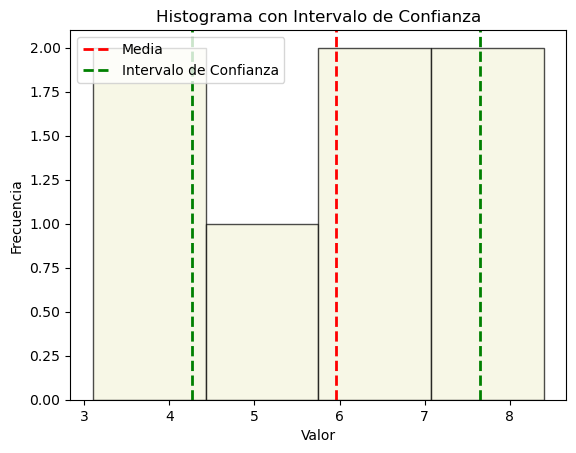

Límite inferior del intervalo de confianza: 4.268
Límite superior del intervalo de confianza: 7.646


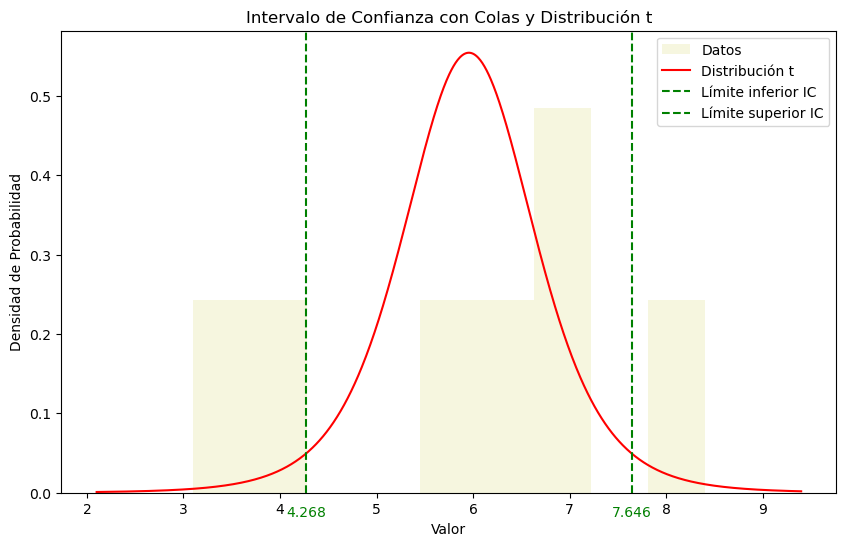

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Lista de valores
valores = [7.1, 4.2, 6.4, 5.5, 7.0, 3.1, 8.4]

# Crear un DataFrame
df = pd.DataFrame(valores, columns=['Columna'])

# Calcular la media y desviación estándar
media = np.mean(df['Columna'])
desviacion_estandar = np.std(df['Columna'])

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.95, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Graficar el histograma y agregar el intervalo de confianza
plt.hist(df['Columna'], bins='auto', alpha=0.7, color='beige', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

print(df.describe())

# Etiquetas y leyenda
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma con Intervalo de Confianza')

# Mostrar la gráfica
plt.show()

# Imprimir los límites del intervalo de confianza
limite_inferior, limite_superior = intervalo_confianza
# Imprimir los resultados con tres decimales
print("Límite inferior del intervalo de confianza:", "{:.3f}".format(intervalo_confianza[0]))
print("Límite superior del intervalo de confianza:", "{:.3f}".format(intervalo_confianza[1]))


# Crear un rango de valores para la x
x = np.linspace(np.min(df['Columna']) - 1, np.max(df['Columna']) + 1, 1000)

# Calcular la densidad de probabilidad de la distribución t en el rango de x
pdf = stats.t.pdf(x, len(df['Columna'])-1, loc=np.mean(df['Columna']), scale=stats.sem(df['Columna']))

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(df['Columna'], bins=9, density=True, alpha=0.9, color='beige', label='Datos')

# Curva de la distribución t
plt.plot(x, pdf, color='red', label='Distribución t')

# Intervalo de confianza con colas
plt.axvline(intervalo_confianza[0], color='green', linestyle='--', label='Límite inferior IC')
plt.axvline(intervalo_confianza[1], color='green', linestyle='--', label='Límite superior IC')

# Etiquetas y leyenda
plt.title('Intervalo de Confianza con Colas y Distribución t')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Agregar etiquetas con los valores del intervalo de confianza justo fuera del gráfico
plt.text(intervalo_confianza[0], -0.03, f'{intervalo_confianza[0]:.3f}', color='green', ha='center')
plt.text(intervalo_confianza[1], -0.03, f'{intervalo_confianza[1]:.3f}', color='green', ha='center')


# Mostrar el gráfico
plt.show()

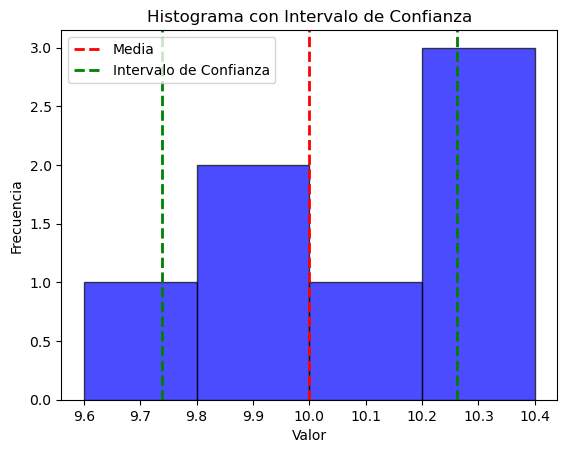

Límite inferior del intervalo de confianza: 9.738414120176683
Límite superior del intervalo de confianza: 10.261585879823317


In [28]:
# Lista de valores
valores = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6]

# Crear un DataFrame
df = pd.DataFrame(valores, columns=['Columna'])

# Calcular la media y desviación estándar
media = np.mean(df['Columna'])
desviacion_estandar = np.std(df['Columna'])

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.95, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Graficar el histograma y agregar el intervalo de confianza
plt.hist(df['Columna'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma con Intervalo de Confianza')

# Mostrar la gráfica

plt.show()

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.95, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Imprimir los límites del intervalo de confianza
limite_inferior, limite_superior = intervalo_confianza
print(f"Límite inferior del intervalo de confianza: {limite_inferior}")
print(f"Límite superior del intervalo de confianza: {limite_superior}")


### Estimación de la varianza poblacional

In [29]:
import numpy as np
from scipy.stats import chi2

# Datos
valores = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6]
n = len(valores)
s2 = np.var(valores, ddof=1)  # Varianza muestral

# Nivel de confianza
confianza = 0.95
alpha = 1 - confianza

# Cálculo de los valores críticos de la chi-cuadrado
chi2_alpha_2 = chi2.ppf(alpha/2, df=n-1)
chi2_1_minus_alpha_2 = chi2.ppf(1-alpha/2, df=n-1)

# Cálculo del intervalo de confianza
intervalo_confianza = ((n-1) * s2 / chi2_1_minus_alpha_2, (n-1) * s2 / chi2_alpha_2)

print("Intervalo de Confianza del 95% para la Varianza:")
print(intervalo_confianza)


Intervalo de Confianza del 95% para la Varianza:
(0.03321942913493566, 0.38792761321896313)


# Ejercicios de intervalos de confianza

Pregunta 1
Con los siguientes ejercicios se evaluará el nivel de comprensión del Módulo 2 que encierra las temáticas relacionadas con Intervalos de Confianza. Recuerda leer bien cada pregunta y sus opciones de respuesta.  

En un proceso de control de calidad de una empresa dedicada a la fabricación y distribución de arroz, se tiene interés en analizar la media, 
µ
µ, del peso de un paquete de arroz, el cual se puede representar por medio de una VA X con distribución Normal de media 
µ
µ, con valor desconocido, y desviación estándar 
�
σ, conocida, igual a 5 gramos. Con este fin se recolectó una muestra aleatoria del peso de 16 paquetes de arroz, con los resultados que se presentan en la siguiente tabla: 



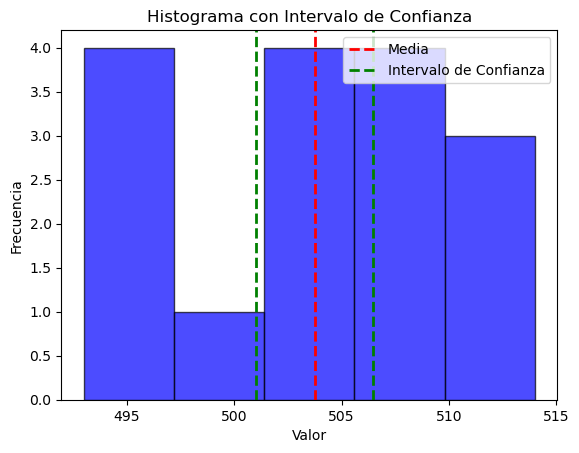

         Columna
count   16.00000
mean   503.75000
std      6.20215
min    493.00000
25%    498.50000
50%    504.50000
75%    508.25000
max    514.00000
Límite inferior del intervalo de confianza: 501.0
Límite superior del intervalo de confianza: 506.5


In [34]:
# Lista de valores
valores = [506,508,499,503,504,510,497,512,514,505,493,496,506,502,509,496]

# Crear un DataFrame
df = pd.DataFrame(valores, columns=['Columna'])

# Calcular la media y desviación estándar
media = np.mean(df['Columna'])
desviacion_estandar = np.std(df['Columna'])

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.90, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Graficar el histograma y agregar el intervalo de confianza
plt.hist(df['Columna'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma con Intervalo de Confianza')

# Mostrar la gráfica

plt.show()

print(df.describe())

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.90, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Imprimir los límites del intervalo de confianza
limite_inferior, limite_superior = np.round(intervalo_confianza, 1)
print(f"Límite inferior del intervalo de confianza: {limite_inferior}")
print(f"Límite superior del intervalo de confianza: {limite_superior}")


In [41]:
import numpy as np
from scipy.stats import norm

# Datos
valores = [506, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506, 502, 509, 496]
n = len(valores)
media_muestral = np.mean(valores)
desviacion_estandar_conocida = 5  # Enunciado: desviación estándar conocida

# Nivel de confianza
confianza = 0.90
alpha = 1 - confianza

# Calcular el valor crítico Z
z_valor_critico = norm.ppf(1 - alpha/2)

# Calcular el intervalo de confianza
intervalo_confianza = (media_muestral - z_valor_critico * (desviacion_estandar_conocida / np.sqrt(n)),
                       media_muestral + z_valor_critico * (desviacion_estandar_conocida / np.sqrt(n)))

# Mostrar el resultado
print(f"Intervalo de Confianza del 90% para la media del peso de un paquete de arroz: {intervalo_confianza}")


Intervalo de Confianza del 90% para la media del peso de un paquete de arroz: (501.6939329663107, 505.8060670336893)


Considere una variable aleatoria 
�
X
  que representa el contenido en mg de aspirina en un frasco de este medicamento. La variable aleatoria 
�
X
  tiene distribución Normal de media y varianza desconocidas. Se toma una muestra aleatoria de 7 frascos de aspirina de la cual se obtienen los siguientes datos: 98, 102, 104, 98, 100, 102 y 96 mg de aspirina.

De acuerdo con la información disponible, ¿cuál es un intervalo de confianza del 95% para la media, 
µ
µ
 , del contenido de un frasco de aspirina? 

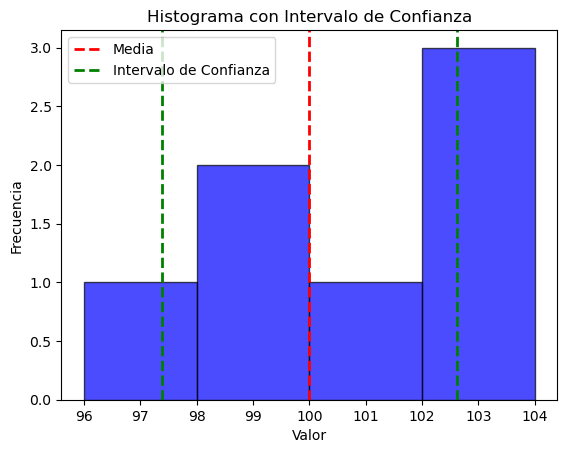

          Columna
count    7.000000
mean   100.000000
std      2.828427
min     96.000000
25%     98.000000
50%    100.000000
75%    102.000000
max    104.000000
Límite inferior del intervalo de confianza: 97.38
Límite superior del intervalo de confianza: 102.62


In [36]:
# Lista de valores
valores = [98, 102, 104, 98, 100, 102, 96]

# Crear un DataFrame
df = pd.DataFrame(valores, columns=['Columna'])

# Calcular la media y desviación estándar
media = np.mean(df['Columna'])
desviacion_estandar = np.std(df['Columna'])

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.95, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Graficar el histograma y agregar el intervalo de confianza
plt.hist(df['Columna'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma con Intervalo de Confianza')

# Mostrar la gráfica

plt.show()

print(df.describe())

# Calcular el intervalo de confianza al 95%
intervalo_confianza = stats.t.interval(0.95, len(df)-1, loc=media, scale=stats.sem(df['Columna']))

# Imprimir los límites del intervalo de confianza
limite_inferior, limite_superior = np.round(intervalo_confianza, 2)
print(f"Límite inferior del intervalo de confianza: {limite_inferior}")
print(f"Límite superior del intervalo de confianza: {limite_superior}")


Un proceso de corte produce placas circulares de acero cuyo diámetro especificado es de 3 cm. Se seleccionan, en forma aleatoria e independiente, 12 de estas placas y se miden sus diámetros, obteniendo los siguientes valores: 3.01, 3.05, 2.99, 2.99, 3.00, 3.02, 2.98, 2.99, 2.97, 2.97, 3.02 y 3.01. Se sabe que el diámetro de una placa se puede representar por medio de una variable aleatoria con distribución Normal. 

¿Cuál es un intervalo de confianza del 99% para la varianza del diámetro de una placa circular de acero? 

In [40]:
import numpy as np
from scipy.stats import chi2

# Datos
valores = [3.01, 3.05, 2.99, 2.99, 3.00, 3.02, 2.98, 2.99, 2.97, 2.97, 3.02, 3.01]
n = len(valores)
s2 = np.var(valores, ddof=1)  # Varianza muestral

# Nivel de confianza
confianza = 0.99
alpha = 1 - confianza

# Cálculo de los valores críticos de la chi-cuadrado
chi2_alpha_2 = chi2.ppf(alpha/2, df=n-1)
chi2_1_minus_alpha_2 = chi2.ppf(1-alpha/2, df=n-1)

# Cálculo del intervalo de confianza
intervalo_confianza = ((n-1) * s2 / chi2_1_minus_alpha_2, (n-1) * s2 / chi2_alpha_2)

print("Intervalo de Confianza del 95% para la Varianza:")
print(intervalo_confianza)


Intervalo de Confianza del 95% para la Varianza:
(0.00022424165187503683, 0.0023048361808346227)
